# EDA

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import datetime
import os
from collections import defaultdict
from pprint import pprint

files:

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bigdata2021-rl-recsys/item_info.csv
/kaggle/input/bigdata2021-rl-recsys/trainset.csv
/kaggle/input/bigdata2021-rl-recsys/track2_testset.csv
/kaggle/input/bigdata2021-rl-recsys/track1_testset.csv


In [3]:
def change_into_datetime(time_int):
    """
    input: 1582992009 (int)
    output: 2020-02-29 16:00:09 (str)
    """
    return datetime.utcfromtimestamp(time_int).strftime('%Y-%m-%d %H:%M:%S')

## Let's first see `trainset.csv`

read data

In [4]:
# read csv
df_trainset = pd.read_csv('/kaggle/input/bigdata2021-rl-recsys/trainset.csv', sep=' ')


In [5]:

for i in tqdm(range(df_trainset.shape[0])):
    # change time into human readable format
    t = int(df_trainset.at[i, 'time'])
    df_trainset.at[i, 'datetime'] = change_into_datetime(t)

    # change time in user_click_history into human readable format
    # notice that some user_click_history == '0:0', which means there is no click history for this user
    t = df_trainset.at[i, 'user_click_history']
    if t == '0:0':
        df_trainset.at[i, 'user_click_history'] = ''
    else:
        new_user_click_history = [sample.split(':')[0] + ':' + change_into_datetime(int(sample.split(':')[1])) for sample in t.split(',')]
        df_trainset.at[i, 'user_click_history'] = ','.join(new_user_click_history)

print('# of row, col:', df_trainset.shape[0], df_trainset.shape[1])
df_trainset.head()

100%|██████████| 260087/260087 [01:10<00:00, 3701.40it/s]

# of row, col: 260087 7


,user_id,user_click_history,user_protrait,exposed_items,labels,time,datetime
0,1,"30:2020-02-02 00:25:30,34:2020-02-08 16:22:17,...","64054,21804,80911,36504,8867,7615,54240,37294,...","1,20,28,99,86,119,213,237,164","1,1,1,1,1,1,1,1,1",1582992009,2020-02-29 16:00:09
1,2,"20:2020-02-02 11:59:22,13:2020-02-02 11:59:25,...","64054,26565,93755,88510,6344,7615,54240,21927,...","1,4,26,112,86,117,191,234,172","1,1,1,1,1,1,1,1,0",1582992010,2020-02-29 16:00:10
2,3,"39:2020-02-03 23:36:15,6:2020-02-03 23:36:21,1...","64054,64086,63021,88510,93500,7615,54240,21927...","22,4,28,48,105,42,193,236,159","1,1,1,0,1,0,0,0,0",1582992014,2020-02-29 16:00:14
3,4,"6:2020-02-02 15:33:28,9:2020-02-02 15:33:32,15...","64054,21531,6599,16721,37078,7615,54240,65505,...","5,16,1,74,133,122,235,218,172","1,1,1,1,1,1,1,1,0",1582992014,2020-02-29 16:00:14
4,5,"37:2020-02-03 15:25:45,36:2020-02-03 15:25:54,...","64054,66036,6599,88510,76066,20543,83978,37294...","6,1,16,85,73,112,239,172,205","1,1,1,1,1,1,1,1,1",1582992017,2020-02-29 16:00:17


### user_click_history analysis

sample one click history:

In [6]:
df_trainset.at[9999, 'user_click_history']#.split(',')

'15:2020-02-01 19:28:12,10:2020-02-01 19:28:22,39:2020-02-01 19:28:26,127:2020-02-01 19:29:25,24:2020-02-01 19:29:58,16:2020-02-01 19:30:05,16:2020-02-02 16:04:26,23:2020-02-02 16:04:29,118:2020-02-02 16:04:41,118:2020-02-02 16:04:42,6:2020-02-09 10:48:56,31:2020-02-09 10:49:06,2:2020-02-09 10:52:55,6:2020-02-09 11:00:57,6:2020-02-09 11:04:41,6:2020-02-10 10:21:22,6:2020-02-10 10:43:49,126:2020-02-10 10:43:56,112:2020-02-10 10:44:02,72:2020-02-10 10:44:09,126:2020-02-10 10:46:05,211:2020-02-10 10:46:10,211:2020-02-10 10:48:00,235:2020-02-10 10:48:03,235:2020-02-10 10:49:33,211:2020-02-10 10:51:16,29:2020-02-10 10:51:26,28:2020-02-10 10:51:30,28:2020-02-10 10:51:56,28:2020-02-10 10:53:14,35:2020-02-10 10:53:18,15:2020-02-10 15:06:30,15:2020-02-11 11:46:21,131:2020-02-11 11:46:25,126:2020-02-11 11:46:28,28:2020-02-15 21:10:29,14:2020-02-15 21:23:11,13:2020-02-15 21:23:16,6:2020-02-16 17:00:52,6:2020-02-16 17:15:21,6:2020-02-17 08:51:00,100:2020-02-17 08:51:09,86:2020-02-17 08:51:14,91:20

In [7]:
df_trainset.at[152453, 'user_click_history']

''

calc len of user_click_history

100%|██████████| 260087/260087 [00:06<00:00, 41667.51it/s]


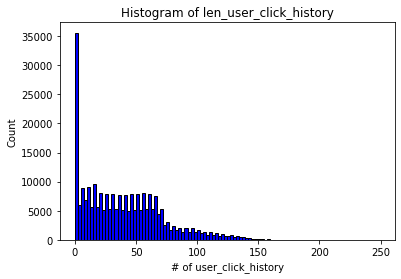

There are 28184 users have 0 click history
There are 3836 users have 1 click history
There are 3556 users have 2 click history
There are 3102 users have 3 click history
There are 2957 users have 4 click history
There are 2880 users have 5 click history
There are 2868 users have 6 click history
There are 3240 users have 7 click history
There are 3589 users have 8 click history
There are 3305 users have 9 click history
There are 3130 users have 10 click history
There are 2912 users have 11 click history
There are 3008 users have 12 click history
There are 2840 users have 13 click history
There are 2853 users have 14 click history
There are 3155 users have 15 click history
There are 3269 users have 16 click history
There are 3201 users have 17 click history
There are 2983 users have 18 click history
There are 2679 users have 19 click history
There are 2611 users have 20 click history
There are 2650 users have 21 click history
There are 2714 users have 22 click history
There are 2635 users

In [8]:
for i in tqdm(range(df_trainset.shape[0])):
    user_click_history = df_trainset.at[i, 'user_click_history']
    if user_click_history == '':
        len_user_click_history = 0
    else:
        len_user_click_history = int(len(user_click_history.split(',')))
    df_trainset.at[i, 'len_user_click_history'] = len_user_click_history

arr = np.array(df_trainset['len_user_click_history'])
plt.hist(arr, color='blue', edgecolor='black', bins=100)
plt.title('Histogram of len_user_click_history')
plt.xlabel('# of user_click_history')
plt.ylabel('Count')
plt.show()

arr = np.array(df_trainset['len_user_click_history'])
for i in range(100):
    print('There are', len(arr[arr == i]), 'users have', i, 'click history')

what items are users clicking?

In [9]:
counter = defaultdict(lambda: 0)
for i in tqdm(range(df_trainset.shape[0])):
    user_click_history = df_trainset.at[i, 'user_click_history']
    if user_click_history == '':
        continue
    for c in user_click_history.split(','):
        itemid = c.split(':')[0]
        counter[itemid] += 1
counter = dict(counter)
counter_sorted = sorted(counter.items(), key=lambda x: x[1], reverse=True)
pprint(counter_sorted)

100%|██████████| 260087/260087 [00:09<00:00, 26601.21it/s]

[('1', 370354),
 ('28', 324683),
 ('164', 289927),
 ('14', 284915),
 ('29', 258330),
 ('196', 233589),
 ('200', 216048),
 ('5', 190309),
 ('32', 188267),
 ('2', 171447),
 ('15', 167346),
 ('127', 152368),
 ('73', 145888),
 ('199', 143226),
 ('86', 143203),
 ('33', 136150),
 ('126', 126780),
 ('7', 120695),
 ('235', 120047),
 ('30', 119854),
 ('101', 118376),
 ('4', 116919),
 ('125', 114040),
 ('3', 113207),
 ('31', 113135),
 ('34', 112362),
 ('77', 111075),
 ('72', 107915),
 ('6', 107823),
 ('172', 107103),
 ('234', 104991),
 ('10', 103417),
 ('21', 97580),
 ('18', 96617),
 ('35', 95681),
 ('81', 95136),
 ('39', 93147),
 ('25', 92231),
 ('19', 91433),
 ('130', 90898),
 ('51', 89937),
 ('56', 87003),
 ('26', 84288),
 ('20', 83510),
 ('17', 82821),
 ('16', 82517),
 ('132', 78696),
 ('129', 76225),
 ('38', 75701),
 ('100', 75084),
 ('233', 74623),
 ('9', 74396),
 ('213', 73690),
 ('8', 72634),
 ('24', 71076),
 ('99', 70854),
 ('131', 68907),
 ('184', 67629),
 ('107', 66993),
 ('80', 65990

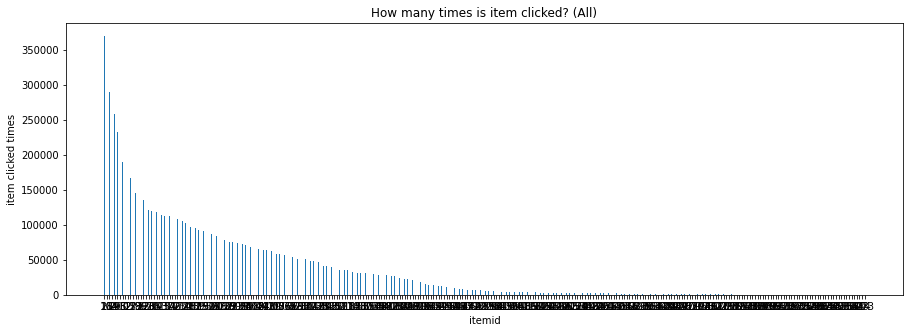

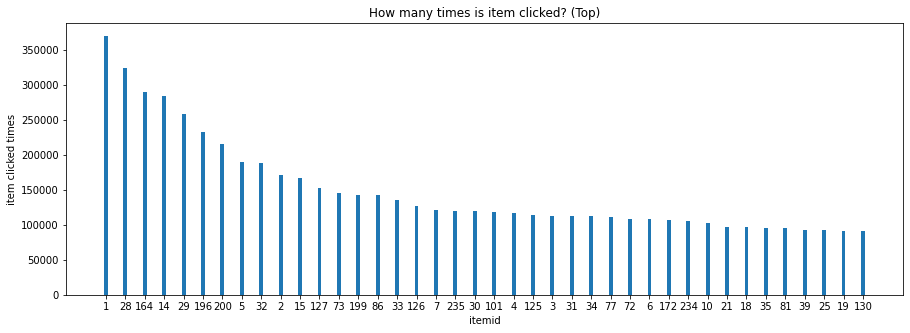

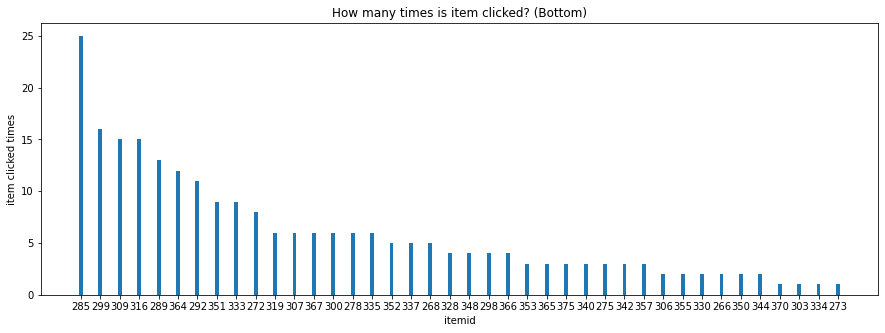

In [10]:
nums_to_plot = counter_sorted
itemids = [n[0] for n in nums_to_plot]
click_cnt = [n[1] for n in nums_to_plot]
plt.figure(figsize=(15, 5))
plt.bar(itemids, click_cnt, width=0.2)
plt.title('How many times is item clicked? (All)')
plt.xlabel('itemid')
plt.ylabel('item clicked times')
# plt.tight_layout()
plt.show()


nums_to_plot = counter_sorted[:40]
itemids = [n[0] for n in nums_to_plot]
click_cnt = [n[1] for n in nums_to_plot]
plt.figure(figsize=(15, 5))
plt.bar(itemids, click_cnt, width=0.2)
plt.title('How many times is item clicked? (Top)')
plt.xlabel('itemid')
plt.ylabel('item clicked times')
# plt.tight_layout()
plt.show()


nums_to_plot = counter_sorted[-40:]
itemids = [n[0] for n in nums_to_plot]
click_cnt = [n[1] for n in nums_to_plot]
plt.figure(figsize=(15, 5))
plt.bar(itemids, click_cnt, width=0.2)
plt.title('How many times is item clicked? (Bottom)')
plt.xlabel('itemid')
plt.ylabel('item clicked times')
# plt.tight_layout()
plt.show()

click by session

In [11]:
# count sum
counter = defaultdict(lambda: 0)
for i in tqdm(range(df_trainset.shape[0])):
    user_click_history = df_trainset.at[i, 'user_click_history']
    if user_click_history == '':
        continue
    for c in user_click_history.split(','):
        itemid = int(c.split(':')[0])
        if 1 <= itemid <= 39:
            counter[1] += 1
        elif 40 <= itemid <= 147:
            counter[2] += 1
        elif 148 <= itemid <= 381:
            counter[3] += 1
        else:
            print('error!')
            print(itemid, c)
            break
counter = dict(counter)
counter_sorted = sorted(counter.items(), key=lambda x: x[1], reverse=True)
pprint(counter_sorted)

100%|██████████| 260087/260087 [00:14<00:00, 17745.98it/s]

[(1, 4606977), (2, 3608173), (3, 2220648)]


In [12]:
counter = defaultdict(lambda: 0)
for i in tqdm(range(df_trainset.shape[0])):
    user_click_history = df_trainset.at[i, 'user_click_history']
    if user_click_history == '':
        continue
    for c in user_click_history.split(','):
        itemid = c.split(':')[0]
        counter[itemid] += 1
counter = dict(counter)
counter_sorted = sorted(counter.items(), key=lambda x: x[1], reverse=True)

100%|██████████| 260087/260087 [00:09<00:00, 26990.31it/s]


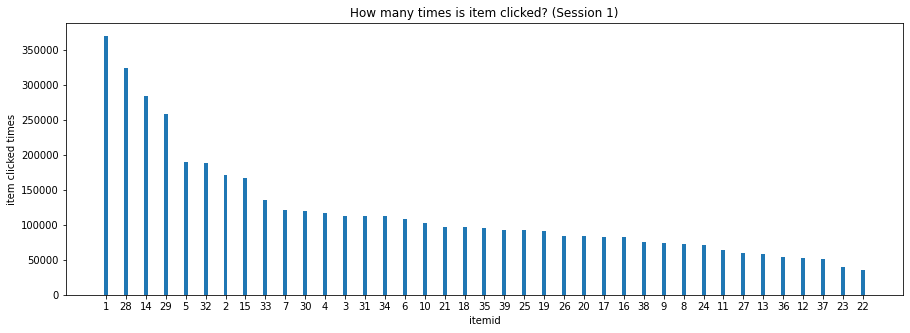

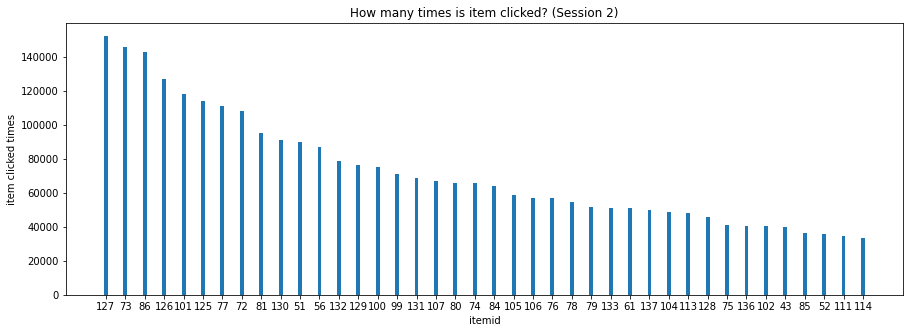

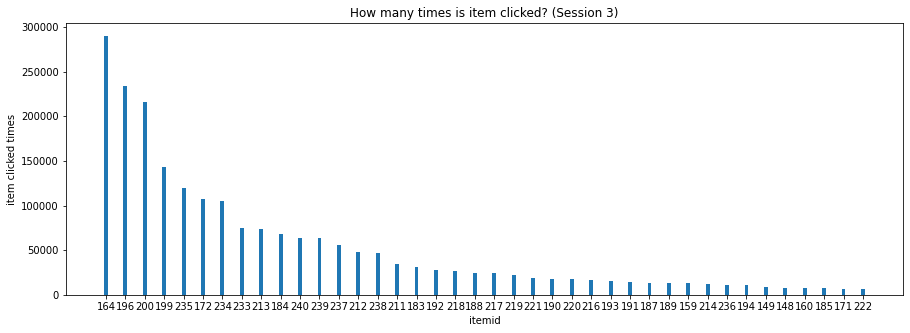

In [13]:
counter_sorted_session1 = [s for s in counter_sorted if 1 <= int(s[0]) <= 39]
counter_sorted_session2 = [s for s in counter_sorted if 40 <= int(s[0]) <= 147]
counter_sorted_session3 = [s for s in counter_sorted if 148 <= int(s[0]) <= 381]

nums_to_plot = counter_sorted_session1
itemids = [n[0] for n in nums_to_plot]
click_cnt = [n[1] for n in nums_to_plot]
plt.figure(figsize=(15, 5))
plt.bar(itemids, click_cnt, width=0.2)
plt.title('How many times is item clicked? (Session 1)')
plt.xlabel('itemid')
plt.ylabel('item clicked times')
# plt.tight_layout()
plt.show()

nums_to_plot = counter_sorted_session2[:40]
itemids = [n[0] for n in nums_to_plot]
click_cnt = [n[1] for n in nums_to_plot]
plt.figure(figsize=(15, 5))
plt.bar(itemids, click_cnt, width=0.2)
plt.title('How many times is item clicked? (Session 2)')
plt.xlabel('itemid')
plt.ylabel('item clicked times')
# plt.tight_layout()
plt.show()

nums_to_plot = counter_sorted_session3[:40]
itemids = [n[0] for n in nums_to_plot]
click_cnt = [n[1] for n in nums_to_plot]
plt.figure(figsize=(15, 5))
plt.bar(itemids, click_cnt, width=0.2)
plt.title('How many times is item clicked? (Session 3)')
plt.xlabel('itemid')
plt.ylabel('item clicked times')
# plt.tight_layout()
plt.show()

## exposed_items and bought analysis

expose by session

100%|██████████| 260087/260087 [00:06<00:00, 41672.33it/s]


[('28', 51524),
 ('1', 45880),
 ('14', 43859),
 ('164', 43295),
 ('29', 37876),
 ('200', 36666),
 ('32', 33349),
 ('5', 32064),
 ('196', 31995),
 ('2', 27270),
 ('172', 26563),
 ('15', 24815),
 ('33', 24179),
 ('86', 21223),
 ('30', 20954),
 ('127', 20192),
 ('25', 20071),
 ('4', 19901),
 ('3', 19796),
 ('31', 19719),
 ('199', 19683),
 ('21', 19262),
 ('34', 19168),
 ('7', 19167),
 ('10', 18696),
 ('126', 18494),
 ('73', 18262),
 ('39', 17998),
 ('51', 17971),
 ('6', 17951),
 ('35', 17781),
 ('18', 17461),
 ('77', 17365),
 ('235', 16299),
 ('81', 16234),
 ('125', 16160),
 ('26', 16147),
 ('101', 15683),
 ('234', 15559),
 ('19', 15429),
 ('72', 15139),
 ('38', 14934),
 ('130', 14802),
 ('16', 14383),
 ('20', 14292),
 ('9', 14275),
 ('24', 14272),
 ('17', 13993),
 ('8', 13808),
 ('129', 11724),
 ('233', 11649),
 ('27', 11594),
 ('11', 11443),
 ('100', 11336),
 ('132', 11212),
 ('36', 11095),
 ('56', 10874),
 ('13', 10778),
 ('213', 10740),
 ('99', 10630),
 ('37', 10467),
 ('84', 10184),


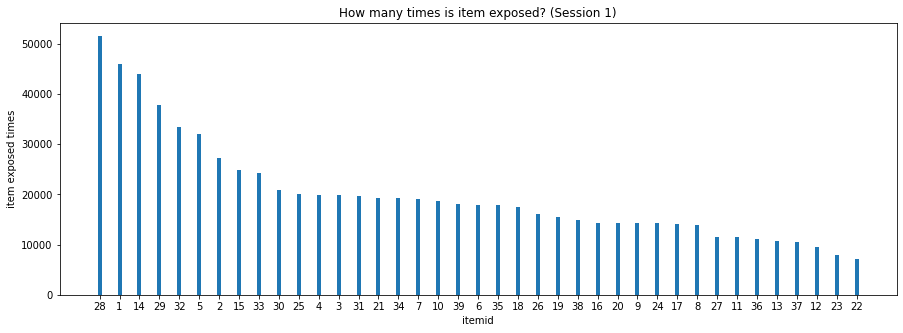

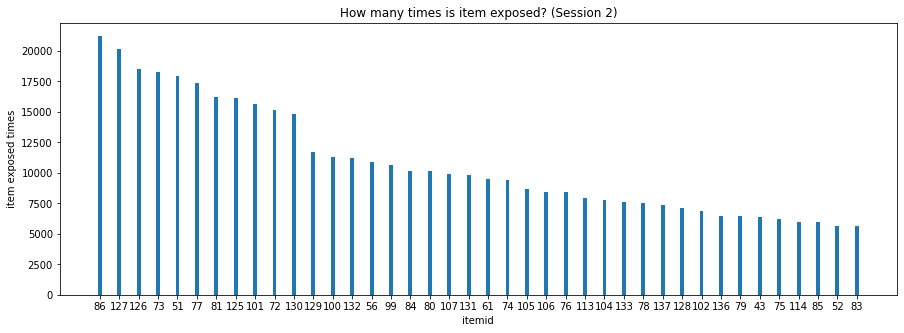

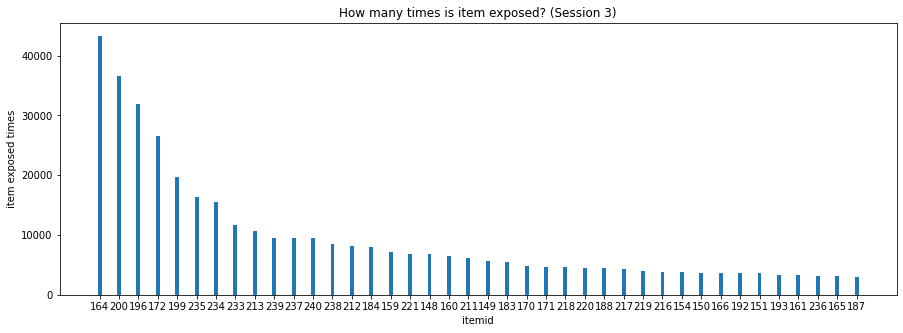

In [14]:
## expose should only be counted when users are in that session
# s1: 0~2, s2: 3~5, s3: 6~9

counter = defaultdict(lambda: 0)
for i in tqdm(range(df_trainset.shape[0])):
    user_exposed_history = df_trainset.at[i, 'exposed_items']
    num_bought = sum([int(l) for l in df_trainset.at[i, 'labels'].split(',')])
    for idx, itemid in enumerate(user_exposed_history.split(',')):
        if 0 <= idx <= 2:
            counter[itemid] += 1
        elif 3 <= idx <= 5 and num_bought >= 3: 
            counter[itemid] += 1
        elif 6 <= idx <= 8 and num_bought >= 6:
            counter[itemid] += 1
counter = dict(counter)
counter_sorted = sorted(counter.items(), key=lambda x: x[1], reverse=True)
pprint(counter_sorted)

counter_sorted_session1 = [s for s in counter_sorted if 1 <= int(s[0]) <= 39]
counter_sorted_session2 = [s for s in counter_sorted if 40 <= int(s[0]) <= 147]
counter_sorted_session3 = [s for s in counter_sorted if 148 <= int(s[0]) <= 381]

nums_to_plot = counter_sorted_session1
itemids = [n[0] for n in nums_to_plot]
click_cnt = [n[1] for n in nums_to_plot]
plt.figure(figsize=(15, 5))
plt.bar(itemids, click_cnt, width=0.2)
plt.title('How many times is item exposed? (Session 1)')
plt.xlabel('itemid')
plt.ylabel('item exposed times')
# plt.tight_layout()
plt.show()

nums_to_plot = counter_sorted_session2[:40]
itemids = [n[0] for n in nums_to_plot]
click_cnt = [n[1] for n in nums_to_plot]
plt.figure(figsize=(15, 5))
plt.bar(itemids, click_cnt, width=0.2)
plt.title('How many times is item exposed? (Session 2)')
plt.xlabel('itemid')
plt.ylabel('item exposed times')
# plt.tight_layout()
plt.show()

nums_to_plot = counter_sorted_session3[:40]
itemids = [n[0] for n in nums_to_plot]
click_cnt = [n[1] for n in nums_to_plot]
plt.figure(figsize=(15, 5))
plt.bar(itemids, click_cnt, width=0.2)
plt.title('How many times is item exposed? (Session 3)')
plt.xlabel('itemid')
plt.ylabel('item exposed times')
# plt.tight_layout()
plt.show()

bought by session

100%|██████████| 260087/260087 [00:04<00:00, 52238.74it/s]


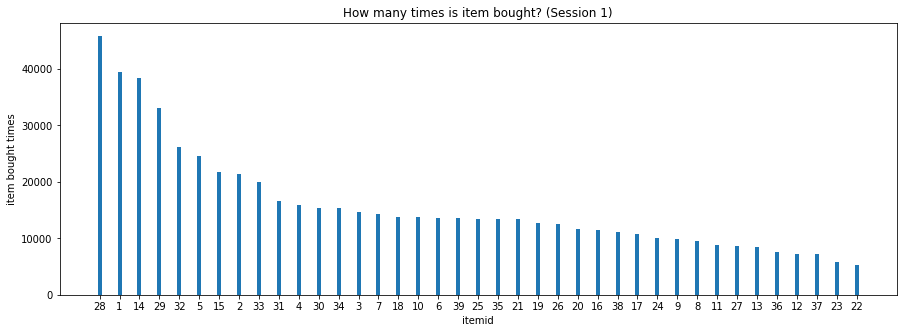

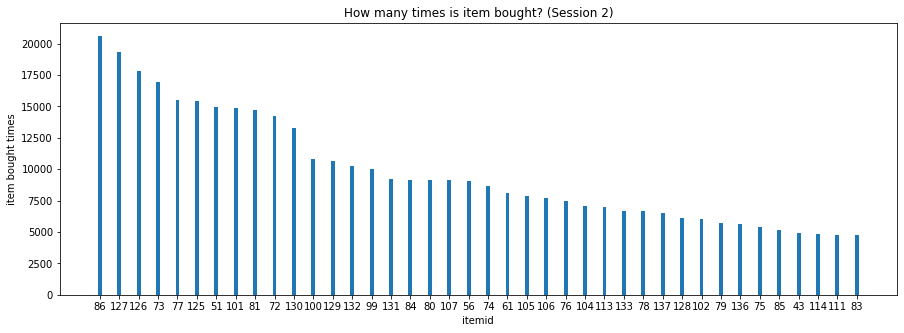

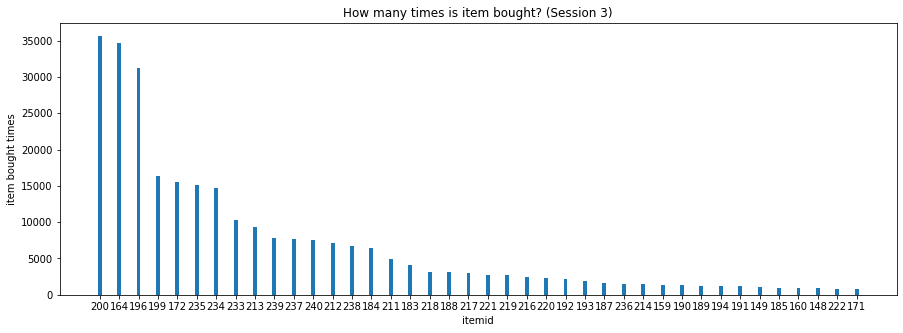

In [15]:
counter = defaultdict(lambda: 0)
for i in tqdm(range(df_trainset.shape[0])):
    user_exposed_history = df_trainset.at[i, 'exposed_items'].split(',')
    labels = df_trainset.at[i, 'labels'].split(',')
    for idx, itemid in enumerate(user_exposed_history):
        if labels[idx] == '1':
            counter[itemid] += 1
counter = dict(counter)
counter_sorted = sorted(counter.items(), key=lambda x: x[1], reverse=True)
# pprint(counter_sorted)

counter_sorted_session1 = [s for s in counter_sorted if 1 <= int(s[0]) <= 39]
counter_sorted_session2 = [s for s in counter_sorted if 40 <= int(s[0]) <= 147]
counter_sorted_session3 = [s for s in counter_sorted if 148 <= int(s[0]) <= 381]

nums_to_plot = counter_sorted_session1
itemids = [n[0] for n in nums_to_plot]
click_cnt = [n[1] for n in nums_to_plot]
plt.figure(figsize=(15, 5))
plt.bar(itemids, click_cnt, width=0.2)
plt.title('How many times is item bought? (Session 1)')
plt.xlabel('itemid')
plt.ylabel('item bought times')
# plt.tight_layout()
plt.show()

nums_to_plot = counter_sorted_session2[:40]
itemids = [n[0] for n in nums_to_plot]
click_cnt = [n[1] for n in nums_to_plot]
plt.figure(figsize=(15, 5))
plt.bar(itemids, click_cnt, width=0.2)
plt.title('How many times is item bought? (Session 2)')
plt.xlabel('itemid')
plt.ylabel('item bought times')
# plt.tight_layout()
plt.show()

nums_to_plot = counter_sorted_session3[:40]
itemids = [n[0] for n in nums_to_plot]
click_cnt = [n[1] for n in nums_to_plot]
plt.figure(figsize=(15, 5))
plt.bar(itemids, click_cnt, width=0.2)
plt.title('How many times is item bought? (Session 3)')
plt.xlabel('itemid')
plt.ylabel('item bought times')
# plt.tight_layout()
plt.show()

expose vs bought

100%|██████████| 260087/260087 [00:08<00:00, 29641.30it/s]


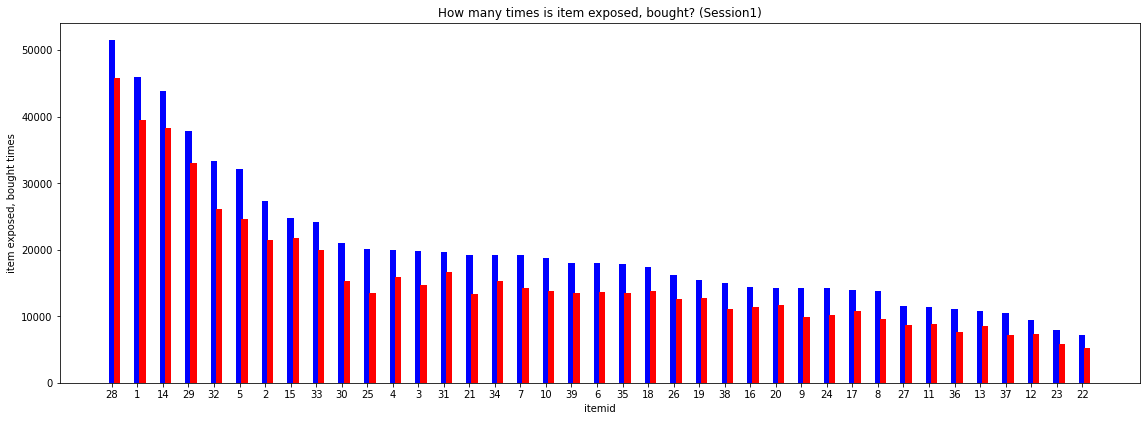

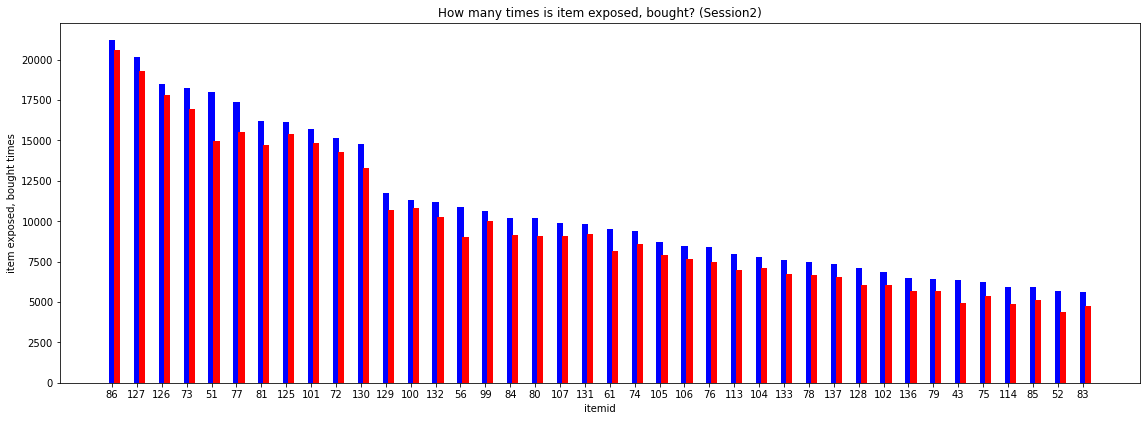

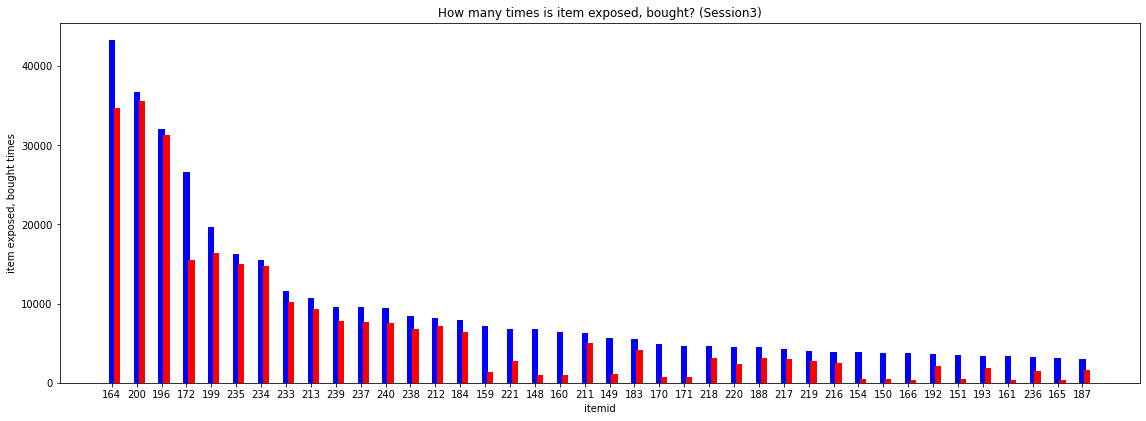

In [16]:
## expose should only be counted when users are in that session
# s1: 0~2, s2: 3~5, s3: 6~9

counter = defaultdict(lambda: [0, 0])
for i in tqdm(range(df_trainset.shape[0])):
    user_exposed_history = df_trainset.at[i, 'exposed_items']
    num_bought = sum([int(l) for l in df_trainset.at[i, 'labels'].split(',')])
    labels = df_trainset.at[i, 'labels'].split(',')
    for idx, itemid in enumerate(user_exposed_history.split(',')):
        if 0 <= idx <= 2:
            counter[itemid][0] += 1
            if labels[idx] == '1':
                counter[itemid][1] += 1
        elif 3 <= idx <= 5 and num_bought >= 3: 
            counter[itemid][0] += 1
            if labels[idx] == '1':
                counter[itemid][1] += 1
        elif 6 <= idx <= 8 and num_bought >= 6:
            counter[itemid][0] += 1
            if labels[idx] == '1':
                counter[itemid][1] += 1
counter = dict(counter)
counter_sorted = sorted(counter.items(), key=lambda x: x[1][0], reverse=True)

counter_sorted_session1 = [s for s in counter_sorted if 1 <= int(s[0]) <= 39]
counter_sorted_session2 = [s for s in counter_sorted if 40 <= int(s[0]) <= 147]
counter_sorted_session3 = [s for s in counter_sorted if 148 <= int(s[0]) <= 381]

nums_to_plot = counter_sorted_session1[:40]
itemids = [n[0] for n in nums_to_plot]
click_cnt = [n[1][0] for n in nums_to_plot]
bought_cnt = [n[1][1] for n in nums_to_plot]
X = np.arange(len(itemids))
fig = plt.figure(figsize=(15, 5))
plt.bar(itemids, click_cnt, width=0.2)
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, click_cnt, color = 'b', width = 0.25)
ax.bar(X + 0.20, bought_cnt, color = 'r', width = 0.25)
plt.xticks(X, itemids)
plt.title('How many times is item exposed, bought? (Session1)')
plt.xlabel('itemid')
plt.ylabel('item exposed, bought times')
plt.show()

nums_to_plot = counter_sorted_session2[:40]
itemids = [n[0] for n in nums_to_plot]
click_cnt = [n[1][0] for n in nums_to_plot]
bought_cnt = [n[1][1] for n in nums_to_plot]
X = np.arange(len(itemids))
fig = plt.figure(figsize=(15, 5))
plt.bar(itemids, click_cnt, width=0.2)
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, click_cnt, color = 'b', width = 0.25)
ax.bar(X + 0.20, bought_cnt, color = 'r', width = 0.25)
plt.xticks(X, itemids)
plt.title('How many times is item exposed, bought? (Session2)')
plt.xlabel('itemid')
plt.ylabel('item exposed, bought times')
plt.show()

nums_to_plot = counter_sorted_session3[:40]
itemids = [n[0] for n in nums_to_plot]
click_cnt = [n[1][0] for n in nums_to_plot]
bought_cnt = [n[1][1] for n in nums_to_plot]
X = np.arange(len(itemids))
fig = plt.figure(figsize=(15, 5))
plt.bar(itemids, click_cnt, width=0.2)
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, click_cnt, color = 'b', width = 0.25)
ax.bar(X + 0.20, bought_cnt, color = 'r', width = 0.25)
plt.xticks(X, itemids)
plt.title('How many times is item exposed, bought? (Session3)')
plt.xlabel('itemid')
plt.ylabel('item exposed, bought times')
plt.show()

Bought vs Expose (expose只算到对应session的) by session

In [17]:
## expose should only be counted when users are in that session
# s1: 0~2, s2: 3~5, s3: 6~9

counter = defaultdict(lambda: [0, 0, 0])
for i in tqdm(range(df_trainset.shape[0])):
    user_exposed_history = df_trainset.at[i, 'exposed_items']
    num_bought = sum([int(l) for l in df_trainset.at[i, 'labels'].split(',')])
    labels = df_trainset.at[i, 'labels'].split(',')
    for idx, itemid in enumerate(user_exposed_history.split(',')):
        if 0 <= idx <= 2:
            counter[itemid][0] += 1
            if labels[idx] == '1':
                counter[itemid][1] += 1
        elif 3 <= idx <= 5 and num_bought >= 3: 
            counter[itemid][0] += 1
            if labels[idx] == '1':
                counter[itemid][1] += 1
        elif 6 <= idx <= 8 and num_bought >= 6:
            counter[itemid][0] += 1
            if labels[idx] == '1':
                counter[itemid][1] += 1
counter = dict(counter)
for k, v in counter.items():
    counter[k][2] = counter[k][1] / counter[k][0]
counter_sorted = sorted(counter.items(), key=lambda x: x[1][2], reverse=True)

counter_sorted_session1 = [s for s in counter_sorted if 1 <= int(s[0]) <= 39]
counter_sorted_session2 = [s for s in counter_sorted if 40 <= int(s[0]) <= 147]
counter_sorted_session3 = [s for s in counter_sorted if 148 <= int(s[0]) <= 381]

100%|██████████| 260087/260087 [00:08<00:00, 28962.74it/s]


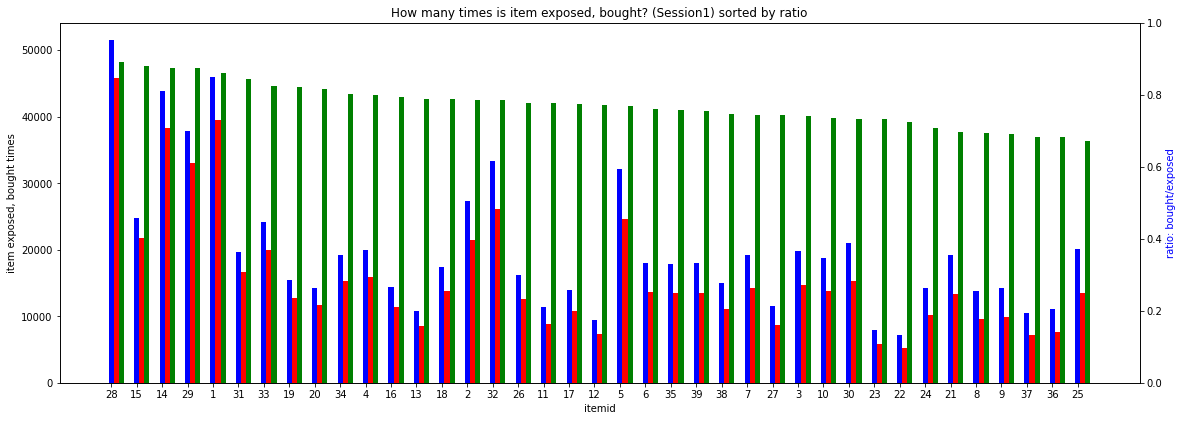

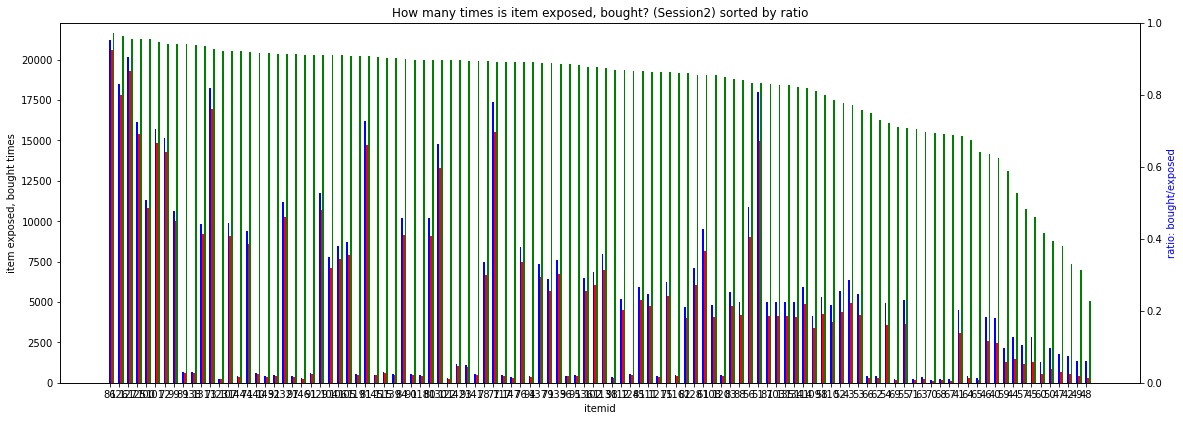

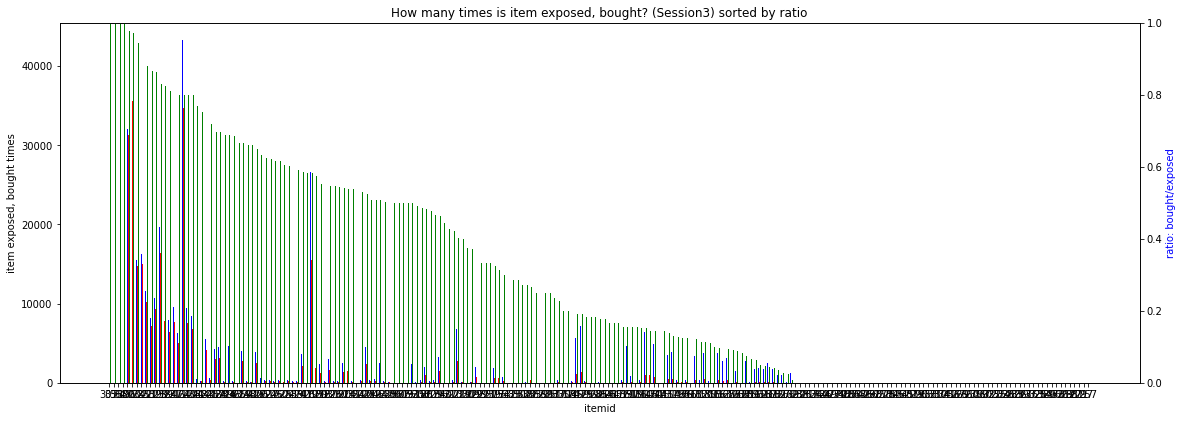

In [18]:
nums_to_plot = counter_sorted_session1
itemids = [n[0] for n in nums_to_plot]
expose_cnt = [n[1][0] for n in nums_to_plot]
bought_cnt = [n[1][1] for n in nums_to_plot]
bought_expose_ratio = [n[1][2] for n in nums_to_plot]
X = np.arange(len(itemids))
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, expose_cnt, color = 'b', width = 0.2)
ax.bar(X + 0.20, bought_cnt, color = 'r', width = 0.2)
plt.xticks(X, itemids)
plt.title('How many times is item exposed, bought? (Session1) sorted by ratio')
plt.xlabel('itemid')
plt.ylabel('item exposed, bought times')
ax2 = ax.twinx()
ax2.bar(X + 0.40, bought_expose_ratio, color = 'g', width = 0.2)
ax2.set_ylim([0, 1])
ax2.set_ylabel('ratio: bought/exposed', color='b')
# plt.yscale('log')
plt.show()


nums_to_plot = counter_sorted_session2
itemids = [n[0] for n in nums_to_plot]
expose_cnt = [n[1][0] for n in nums_to_plot]
bought_cnt = [n[1][1] for n in nums_to_plot]
bought_expose_ratio = [n[1][2] for n in nums_to_plot]
X = np.arange(len(itemids))
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, expose_cnt, color = 'b', width = 0.2)
ax.bar(X + 0.20, bought_cnt, color = 'r', width = 0.2)
plt.xticks(X, itemids)
plt.title('How many times is item exposed, bought? (Session2) sorted by ratio')
plt.xlabel('itemid')
plt.ylabel('item exposed, bought times')
ax2 = ax.twinx()
ax2.bar(X + 0.40, bought_expose_ratio, color = 'g', width = 0.2)
ax2.set_ylim([0, 1])
ax2.set_ylabel('ratio: bought/exposed', color='b')
# plt.yscale('log')
plt.show()


nums_to_plot = counter_sorted_session3
itemids = [n[0] for n in nums_to_plot]
expose_cnt = [n[1][0] for n in nums_to_plot]
bought_cnt = [n[1][1] for n in nums_to_plot]
bought_expose_ratio = [n[1][2] for n in nums_to_plot]
X = np.arange(len(itemids))
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, expose_cnt, color = 'b', width = 0.2)
ax.bar(X + 0.20, bought_cnt, color = 'r', width = 0.2)
plt.xticks(X, itemids)
plt.title('How many times is item exposed, bought? (Session3) sorted by ratio')
plt.xlabel('itemid')
plt.ylabel('item exposed, bought times')
# plt.yscale('log')
ax2 = ax.twinx()
ax2.bar(X + 0.40, bought_expose_ratio, color = 'g', width = 0.2)
ax2.set_ylim([0, 1])
ax2.set_ylabel('ratio: bought/exposed', color='b')
plt.show()

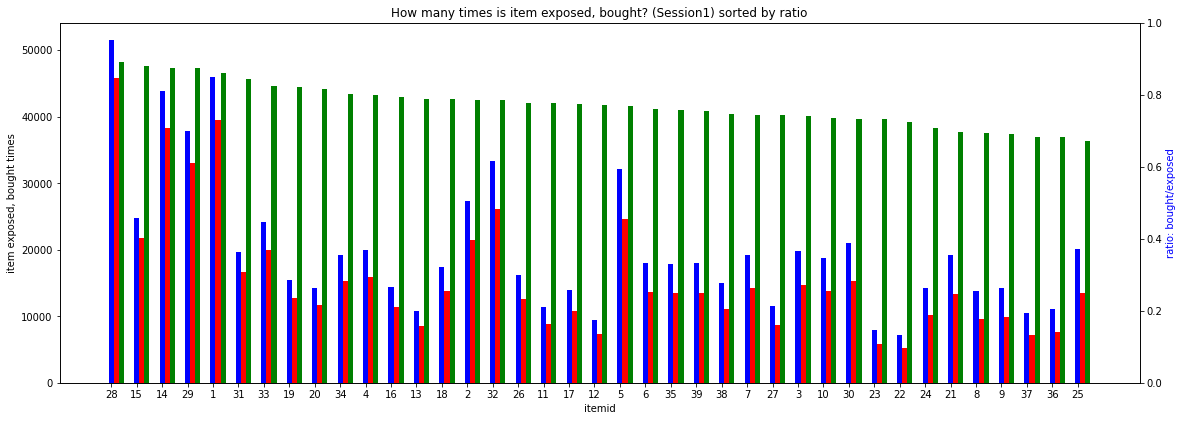

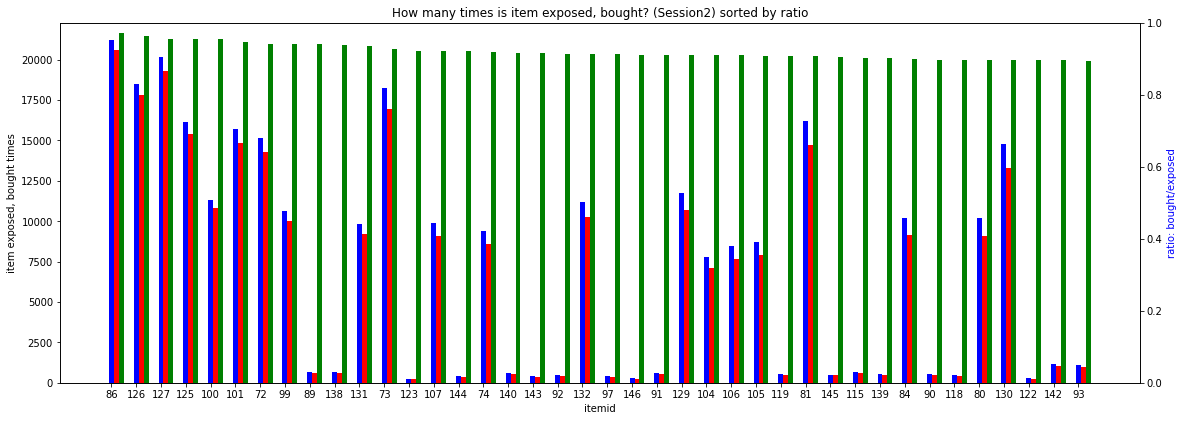

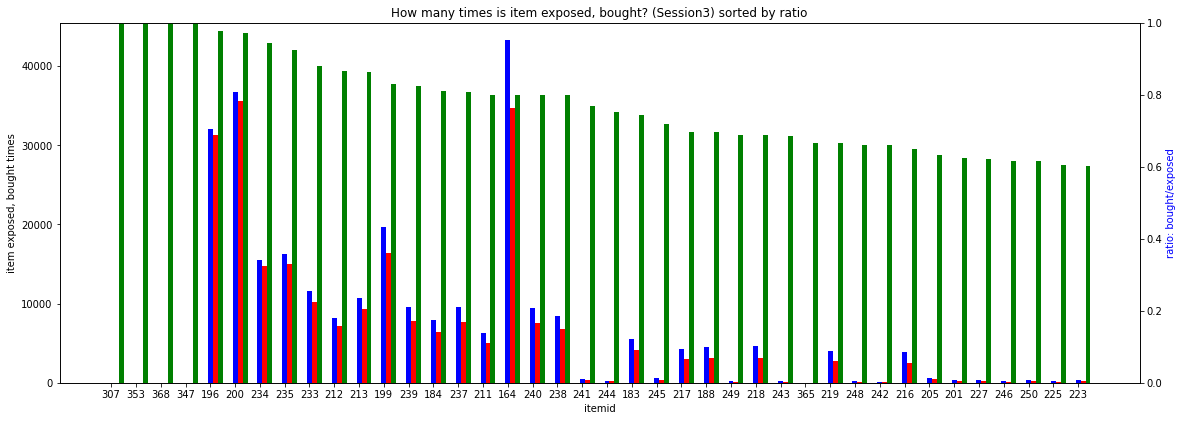

In [19]:
nums_to_plot = counter_sorted_session1[:40]
itemids = [n[0] for n in nums_to_plot]
expose_cnt = [n[1][0] for n in nums_to_plot]
bought_cnt = [n[1][1] for n in nums_to_plot]
bought_expose_ratio = [n[1][2] for n in nums_to_plot]
X = np.arange(len(itemids))
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, expose_cnt, color = 'b', width = 0.2)
ax.bar(X + 0.20, bought_cnt, color = 'r', width = 0.2)
plt.xticks(X, itemids)
plt.title('How many times is item exposed, bought? (Session1) sorted by ratio')
plt.xlabel('itemid')
plt.ylabel('item exposed, bought times')
ax2 = ax.twinx()
ax2.bar(X + 0.40, bought_expose_ratio, color = 'g', width = 0.2)
ax2.set_ylim([0, 1])
ax2.set_ylabel('ratio: bought/exposed', color='b')
# plt.yscale('log')
plt.show()


nums_to_plot = counter_sorted_session2[:40]
itemids = [n[0] for n in nums_to_plot]
expose_cnt = [n[1][0] for n in nums_to_plot]
bought_cnt = [n[1][1] for n in nums_to_plot]
bought_expose_ratio = [n[1][2] for n in nums_to_plot]
X = np.arange(len(itemids))
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, expose_cnt, color = 'b', width = 0.2)
ax.bar(X + 0.20, bought_cnt, color = 'r', width = 0.2)
plt.xticks(X, itemids)
plt.title('How many times is item exposed, bought? (Session2) sorted by ratio')
plt.xlabel('itemid')
plt.ylabel('item exposed, bought times')
ax2 = ax.twinx()
ax2.bar(X + 0.40, bought_expose_ratio, color = 'g', width = 0.2)
ax2.set_ylim([0, 1])
ax2.set_ylabel('ratio: bought/exposed', color='b')
# plt.yscale('log')
plt.show()


nums_to_plot = counter_sorted_session3[:40]
itemids = [n[0] for n in nums_to_plot]
expose_cnt = [n[1][0] for n in nums_to_plot]
bought_cnt = [n[1][1] for n in nums_to_plot]
bought_expose_ratio = [n[1][2] for n in nums_to_plot]
X = np.arange(len(itemids))
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, expose_cnt, color = 'b', width = 0.2)
ax.bar(X + 0.20, bought_cnt, color = 'r', width = 0.2)
plt.xticks(X, itemids)
plt.title('How many times is item exposed, bought? (Session3) sorted by ratio')
plt.xlabel('itemid')
plt.ylabel('item exposed, bought times')
ax2 = ax.twinx()
ax2.bar(X + 0.40, bought_expose_ratio, color = 'g', width = 0.2)
ax2.set_ylim([0, 1])
ax2.set_ylabel('ratio: bought/exposed', color='b')
# plt.yscale('log')
plt.show()



## labels analysis

100%|██████████| 260087/260087 [00:06<00:00, 42259.96it/s]


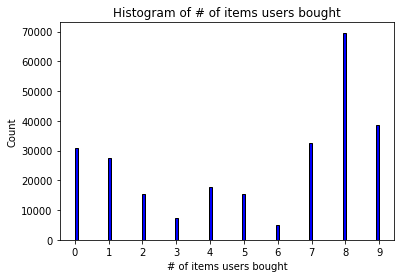

There are 30912 users have bout 0 items
There are 27620 users have bout 1 items
There are 15330 users have bout 2 items
There are 7317 users have bout 3 items
There are 17895 users have bout 4 items
There are 15486 users have bout 5 items
There are 4810 users have bout 6 items
There are 32512 users have bout 7 items
There are 69645 users have bout 8 items
There are 38560 users have bout 9 items


In [20]:
for i in tqdm(range(df_trainset.shape[0])):
    labels = df_trainset.at[i, 'labels'].split(',')
    df_trainset.at[i, 'cnt_labels'] = sum([int(l) for l in labels])

arr = np.array(df_trainset['cnt_labels'])
plt.hist(arr, color='blue', edgecolor='black', bins=100)
plt.title('Histogram of # of items users bought')
plt.xticks(range(10), range(10))
plt.xlabel('# of items users bought')
plt.ylabel('Count')
plt.show()

arr = np.array(df_trainset['cnt_labels'])
for i in range(10):
    print('There are', len(arr[arr == i]), 'users have bout', i, 'items')

Bought vs Expose (expose算所有session的) by session

100%|██████████| 260087/260087 [00:08<00:00, 31891.53it/s]


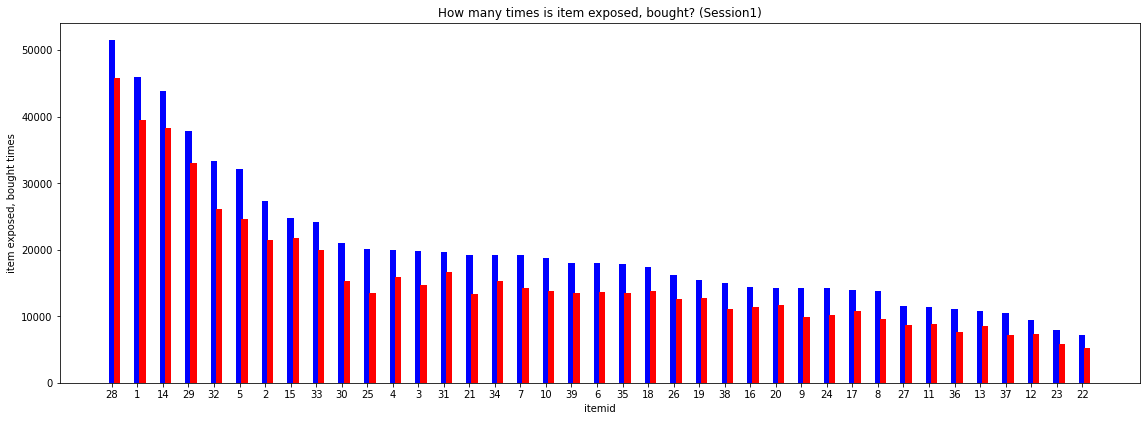

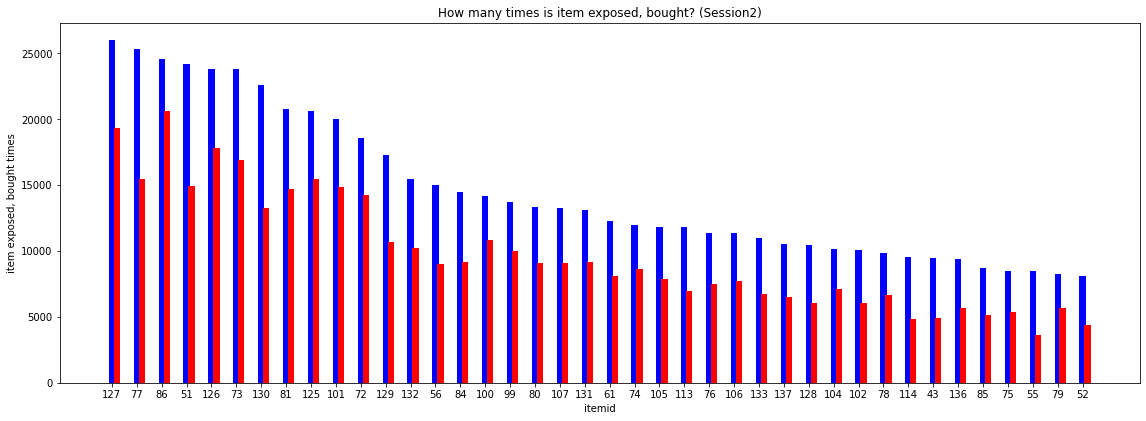

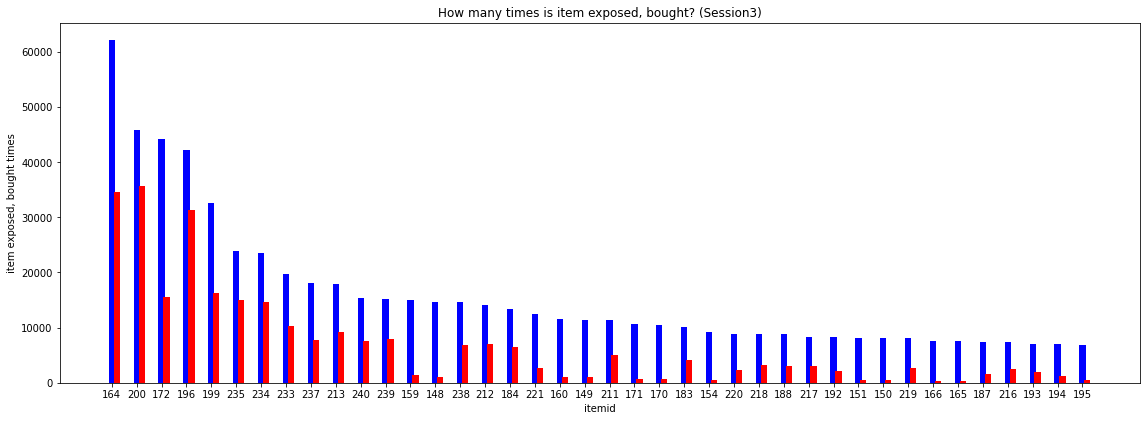

In [21]:
## expose should only be counted when users are in that session
# s1: 0~2, s2: 3~5, s3: 6~9

counter = defaultdict(lambda: [0, 0])
for i in tqdm(range(df_trainset.shape[0])):
    user_exposed_history = df_trainset.at[i, 'exposed_items']
    num_bought = sum([int(l) for l in df_trainset.at[i, 'labels'].split(',')])
    labels = df_trainset.at[i, 'labels'].split(',')
    for idx, itemid in enumerate(user_exposed_history.split(',')):
        counter[itemid][0] += 1
        if labels[idx] == '1':
            counter[itemid][1] += 1
counter = dict(counter)
counter_sorted = sorted(counter.items(), key=lambda x: x[1][0], reverse=True)

counter_sorted_session1 = [s for s in counter_sorted if 1 <= int(s[0]) <= 39]
counter_sorted_session2 = [s for s in counter_sorted if 40 <= int(s[0]) <= 147]
counter_sorted_session3 = [s for s in counter_sorted if 148 <= int(s[0]) <= 381]

nums_to_plot = counter_sorted_session1[:40]
itemids = [n[0] for n in nums_to_plot]
click_cnt = [n[1][0] for n in nums_to_plot]
bought_cnt = [n[1][1] for n in nums_to_plot]
X = np.arange(len(itemids))
fig = plt.figure(figsize=(15, 5))
plt.bar(itemids, click_cnt, width=0.2)
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, click_cnt, color = 'b', width = 0.25)
ax.bar(X + 0.20, bought_cnt, color = 'r', width = 0.25)
plt.xticks(X, itemids)
plt.title('How many times is item exposed, bought? (Session1)')
plt.xlabel('itemid')
plt.ylabel('item exposed, bought times')
plt.show()

nums_to_plot = counter_sorted_session2[:40]
itemids = [n[0] for n in nums_to_plot]
click_cnt = [n[1][0] for n in nums_to_plot]
bought_cnt = [n[1][1] for n in nums_to_plot]
X = np.arange(len(itemids))
fig = plt.figure(figsize=(15, 5))
plt.bar(itemids, click_cnt, width=0.2)
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, click_cnt, color = 'b', width = 0.25)
ax.bar(X + 0.20, bought_cnt, color = 'r', width = 0.25)
plt.xticks(X, itemids)
plt.title('How many times is item exposed, bought? (Session2)')
plt.xlabel('itemid')
plt.ylabel('item exposed, bought times')
plt.show()

nums_to_plot = counter_sorted_session3[:40]
itemids = [n[0] for n in nums_to_plot]
click_cnt = [n[1][0] for n in nums_to_plot]
bought_cnt = [n[1][1] for n in nums_to_plot]
X = np.arange(len(itemids))
fig = plt.figure(figsize=(15, 5))
plt.bar(itemids, click_cnt, width=0.2)
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, click_cnt, color = 'b', width = 0.25)
ax.bar(X + 0.20, bought_cnt, color = 'r', width = 0.25)
plt.xticks(X, itemids)
plt.title('How many times is item exposed, bought? (Session3)')
plt.xlabel('itemid')
plt.ylabel('item exposed, bought times')
plt.show()

ratio

In [22]:
## expose should only be counted when users are in that session
# s1: 0~2, s2: 3~5, s3: 6~9

counter = defaultdict(lambda: [0, 0, 0])
for i in tqdm(range(df_trainset.shape[0])):
    user_exposed_history = df_trainset.at[i, 'exposed_items']
    num_bought = sum([int(l) for l in df_trainset.at[i, 'labels'].split(',')])
    labels = df_trainset.at[i, 'labels'].split(',')
    for idx, itemid in enumerate(user_exposed_history.split(',')):
        counter[itemid][0] += 1
        if labels[idx] == '1':
            counter[itemid][1] += 1
counter = dict(counter)
for k, v in counter.items():
    counter[k][2] = counter[k][1] / counter[k][0]
counter_sorted = sorted(counter.items(), key=lambda x: x[1][2], reverse=True)

counter_sorted_session1 = [s for s in counter_sorted if 1 <= int(s[0]) <= 39]
counter_sorted_session2 = [s for s in counter_sorted if 40 <= int(s[0]) <= 147]
counter_sorted_session3 = [s for s in counter_sorted if 148 <= int(s[0]) <= 381]

100%|██████████| 260087/260087 [00:08<00:00, 31845.25it/s]


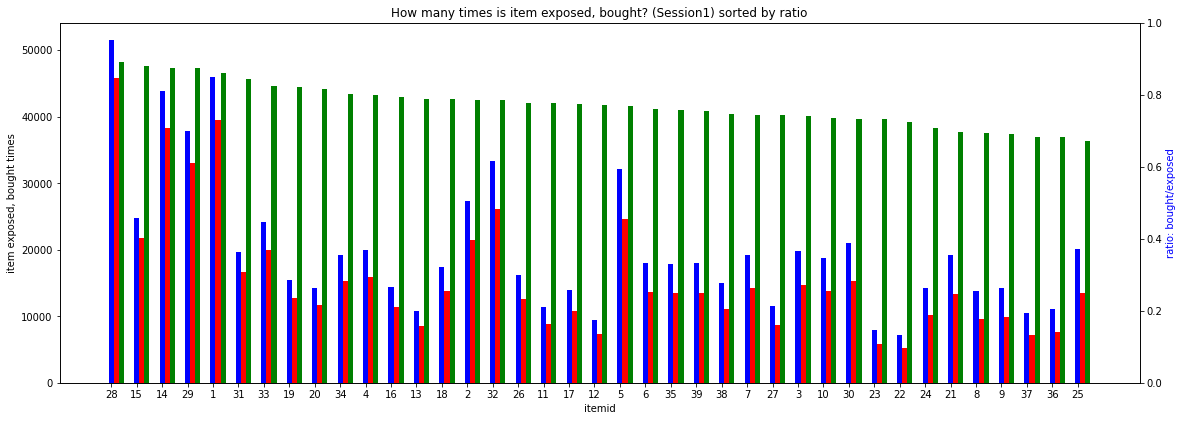

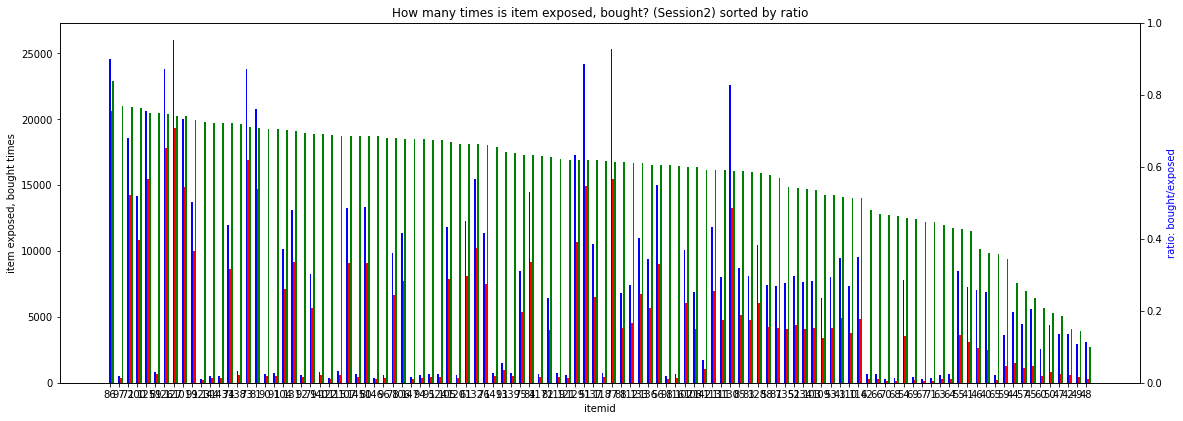

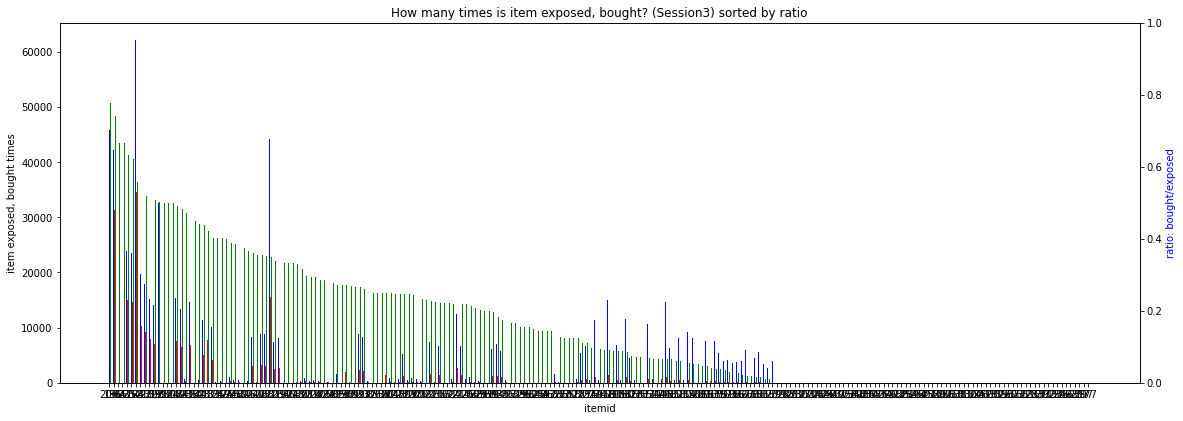

In [23]:
nums_to_plot = counter_sorted_session1
itemids = [n[0] for n in nums_to_plot]
expose_cnt = [n[1][0] for n in nums_to_plot]
bought_cnt = [n[1][1] for n in nums_to_plot]
bought_expose_ratio = [n[1][2] for n in nums_to_plot]
X = np.arange(len(itemids))
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, expose_cnt, color = 'b', width = 0.2)
ax.bar(X + 0.20, bought_cnt, color = 'r', width = 0.2)
plt.xticks(X, itemids)
plt.title('How many times is item exposed, bought? (Session1) sorted by ratio')
plt.xlabel('itemid')
plt.ylabel('item exposed, bought times')
ax2 = ax.twinx()
ax2.bar(X + 0.40, bought_expose_ratio, color = 'g', width = 0.2)
ax2.set_ylim([0, 1])
ax2.set_ylabel('ratio: bought/exposed', color='b')
# plt.yscale('log')
plt.show()


nums_to_plot = counter_sorted_session2
itemids = [n[0] for n in nums_to_plot]
expose_cnt = [n[1][0] for n in nums_to_plot]
bought_cnt = [n[1][1] for n in nums_to_plot]
bought_expose_ratio = [n[1][2] for n in nums_to_plot]
X = np.arange(len(itemids))
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, expose_cnt, color = 'b', width = 0.2)
ax.bar(X + 0.20, bought_cnt, color = 'r', width = 0.2)
plt.xticks(X, itemids)
plt.title('How many times is item exposed, bought? (Session2) sorted by ratio')
plt.xlabel('itemid')
plt.ylabel('item exposed, bought times')
ax2 = ax.twinx()
ax2.bar(X + 0.40, bought_expose_ratio, color = 'g', width = 0.2)
ax2.set_ylim([0, 1])
ax2.set_ylabel('ratio: bought/exposed', color='b')
# plt.yscale('log')
plt.show()


nums_to_plot = counter_sorted_session3
itemids = [n[0] for n in nums_to_plot]
expose_cnt = [n[1][0] for n in nums_to_plot]
bought_cnt = [n[1][1] for n in nums_to_plot]
bought_expose_ratio = [n[1][2] for n in nums_to_plot]
X = np.arange(len(itemids))
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, expose_cnt, color = 'b', width = 0.2)
ax.bar(X + 0.20, bought_cnt, color = 'r', width = 0.2)
plt.xticks(X, itemids)
plt.title('How many times is item exposed, bought? (Session3) sorted by ratio')
plt.xlabel('itemid')
plt.ylabel('item exposed, bought times')
# plt.yscale('log')
ax2 = ax.twinx()
ax2.bar(X + 0.40, bought_expose_ratio, color = 'g', width = 0.2)
ax2.set_ylim([0, 1])
ax2.set_ylabel('ratio: bought/exposed', color='b')
plt.show()

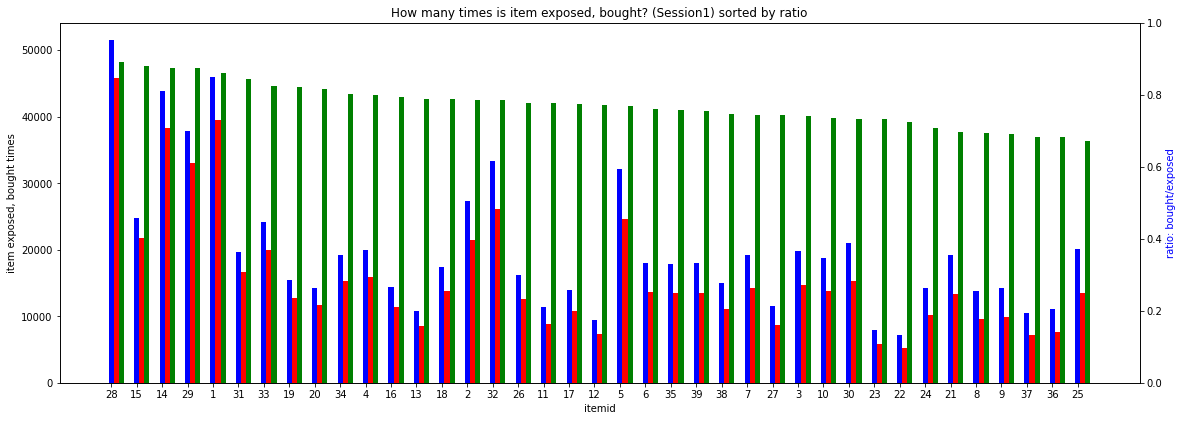

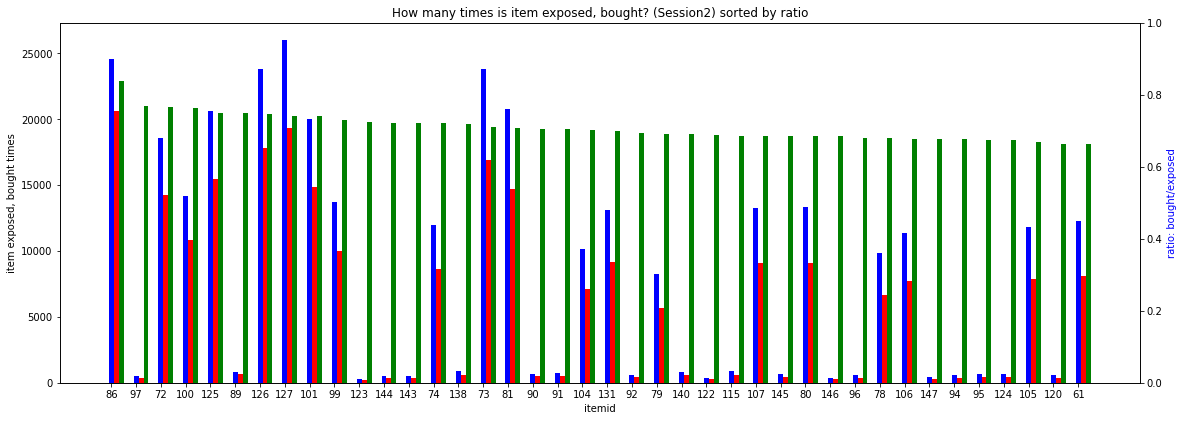

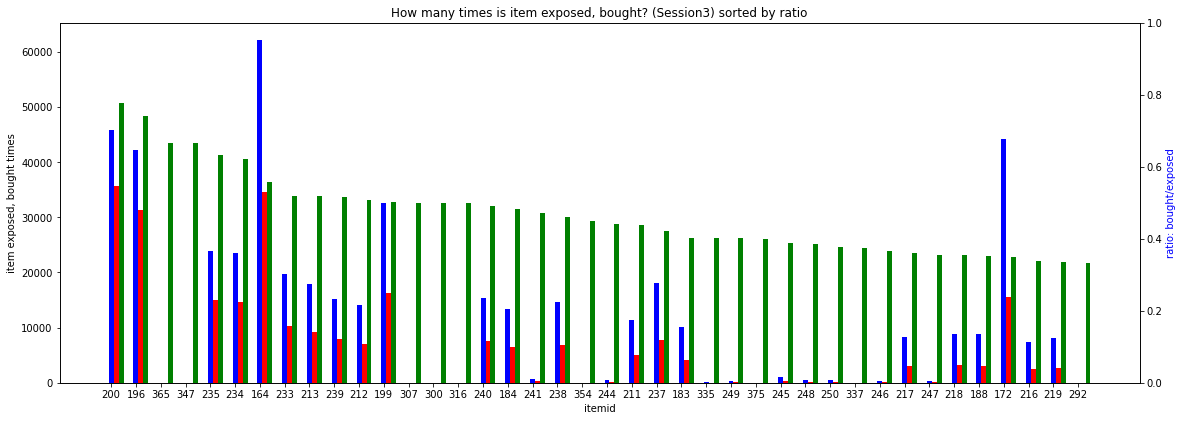

In [24]:
nums_to_plot = counter_sorted_session1[:40]
itemids = [n[0] for n in nums_to_plot]
expose_cnt = [n[1][0] for n in nums_to_plot]
bought_cnt = [n[1][1] for n in nums_to_plot]
bought_expose_ratio = [n[1][2] for n in nums_to_plot]
X = np.arange(len(itemids))
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, expose_cnt, color = 'b', width = 0.2)
ax.bar(X + 0.20, bought_cnt, color = 'r', width = 0.2)
plt.xticks(X, itemids)
plt.title('How many times is item exposed, bought? (Session1) sorted by ratio')
plt.xlabel('itemid')
plt.ylabel('item exposed, bought times')
ax2 = ax.twinx()
ax2.bar(X + 0.40, bought_expose_ratio, color = 'g', width = 0.2)
ax2.set_ylim([0, 1])
ax2.set_ylabel('ratio: bought/exposed', color='b')
# plt.yscale('log')
plt.show()


nums_to_plot = counter_sorted_session2[:40]
itemids = [n[0] for n in nums_to_plot]
expose_cnt = [n[1][0] for n in nums_to_plot]
bought_cnt = [n[1][1] for n in nums_to_plot]
bought_expose_ratio = [n[1][2] for n in nums_to_plot]
X = np.arange(len(itemids))
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, expose_cnt, color = 'b', width = 0.2)
ax.bar(X + 0.20, bought_cnt, color = 'r', width = 0.2)
plt.xticks(X, itemids)
plt.title('How many times is item exposed, bought? (Session2) sorted by ratio')
plt.xlabel('itemid')
plt.ylabel('item exposed, bought times')
ax2 = ax.twinx()
ax2.bar(X + 0.40, bought_expose_ratio, color = 'g', width = 0.2)
ax2.set_ylim([0, 1])
ax2.set_ylabel('ratio: bought/exposed', color='b')
# plt.yscale('log')
plt.show()


nums_to_plot = counter_sorted_session3[:40]
itemids = [n[0] for n in nums_to_plot]
expose_cnt = [n[1][0] for n in nums_to_plot]
bought_cnt = [n[1][1] for n in nums_to_plot]
bought_expose_ratio = [n[1][2] for n in nums_to_plot]
X = np.arange(len(itemids))
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, expose_cnt, color = 'b', width = 0.2)
ax.bar(X + 0.20, bought_cnt, color = 'r', width = 0.2)
plt.xticks(X, itemids)
plt.title('How many times is item exposed, bought? (Session3) sorted by ratio')
plt.xlabel('itemid')
plt.ylabel('item exposed, bought times')
ax2 = ax.twinx()
ax2.bar(X + 0.40, bought_expose_ratio, color = 'g', width = 0.2)
ax2.set_ylim([0, 1])
ax2.set_ylabel('ratio: bought/exposed', color='b')
# plt.yscale('log')
plt.show()



## User portrait

how many unique portrait?

In [25]:
# trainset
portrait_idx_uniquevalue = {}
for portrait_idx in range(10):
    portrait_cnt = defaultdict(lambda: 0)
    counter = defaultdict(lambda: [0, 0, 0])
    for i in tqdm(range(df_trainset.shape[0])):
        user_portrait = df_trainset.at[i, 'user_protrait'].split(',')
        p = user_portrait[portrait_idx]
        portrait_cnt[p] += 1
    # pprint(portrait_cnt)
    portrait_idx_uniquevalue[portrait_idx] = len(portrait_cnt.keys())

print(portrait_idx_uniquevalue)

100%|██████████| 260087/260087 [00:02<00:00, 115313.20it/s]

{0: 3, 1: 1363, 2: 20, 3: 10, 4: 195, 5: 49, 6: 3, 7: 11, 8: 2, 9: 2164}


In [26]:
# testset track1
df_testset_track1 = pd.read_csv('/kaggle/input/bigdata2021-rl-recsys/track1_testset.csv', sep=' ')

portrait_idx_uniquevalue = {}
for portrait_idx in range(10):
    portrait_cnt = defaultdict(lambda: 0)
    counter = defaultdict(lambda: [0, 0, 0])
    for i in tqdm(range(df_testset_track1.shape[0])):
        user_portrait = df_testset_track1.at[i, 'user_protrait'].split(',')
        p = user_portrait[portrait_idx]
        portrait_cnt[p] += 1
    # pprint(portrait_cnt)
    portrait_idx_uniquevalue[portrait_idx] = len(portrait_cnt.keys())

print(portrait_idx_uniquevalue)

100%|██████████| 206254/206254 [00:01<00:00, 116666.51it/s]

{0: 3, 1: 1319, 2: 19, 3: 10, 4: 191, 5: 47, 6: 3, 7: 13, 8: 2, 9: 2054}


In [27]:
# testset track2
df_testset_track2 = pd.read_csv('/kaggle/input/bigdata2021-rl-recsys/track2_testset.csv', sep=' ')

portrait_idx_uniquevalue = {}
for portrait_idx in range(10):
    portrait_cnt = defaultdict(lambda: 0)
    counter = defaultdict(lambda: [0, 0, 0])
    for i in tqdm(range(df_testset_track2.shape[0])):
        user_portrait = df_testset_track2.at[i, 'user_protrait'].split(',')
        p = user_portrait[portrait_idx]
        portrait_cnt[p] += 1
    # pprint(portrait_cnt)
    portrait_idx_uniquevalue[portrait_idx] = len(portrait_cnt.keys())

print(portrait_idx_uniquevalue)

100%|██████████| 206096/206096 [00:01<00:00, 116560.33it/s]

{0: 3, 1: 1341, 2: 20, 3: 10, 4: 190, 5: 47, 6: 3, 7: 11, 8: 2, 9: 2060}


In [28]:
portrait_cnt = defaultdict(lambda: 0)
counter = defaultdict(lambda: [0, 0, 0])
for i in tqdm(range(df_trainset.shape[0])):
    user_portrait = df_trainset.at[i, 'user_protrait'].split(',')
    p = user_portrait[7]
    portrait_cnt[p] += 1
pprint(portrait_cnt)

100%|██████████| 260087/260087 [00:02<00:00, 117553.48it/s]

defaultdict(<function <lambda> at 0x7f59547a8050>,
            {'11606': 5335,
             '16279': 1244,
             '21927': 73113,
             '37294': 82493,
             '50138': 29042,
             '55172': 3448,
             '65505': 13456,
             '6560': 5388,
             '78349': 10419,
             '83395': 4035,
             '93716': 32114})


In [29]:
portrait_cnt = defaultdict(lambda: 0)
counter = defaultdict(lambda: [0, 0, 0])
for i in tqdm(range(df_testset_track1.shape[0])):
    user_portrait = df_testset_track1.at[i, 'user_protrait'].split(',')
    p = user_portrait[7]
    portrait_cnt[p] += 1
pprint(portrait_cnt)

100%|██████████| 206254/206254 [00:01<00:00, 119158.95it/s]

defaultdict(<function <lambda> at 0x7f59547a8e60>,
            {'11606': 4018,
             '16279': 980,
             '18954': 26,
             '21927': 59085,
             '37294': 65777,
             '50138': 21561,
             '55172': 2260,
             '65505': 11547,
             '6560': 3975,
             '78349': 8749,
             '83395': 2782,
             '90068': 2,
             '93716': 25492})


In [30]:
portrait_cnt = defaultdict(lambda: 0)
counter = defaultdict(lambda: [0, 0, 0])
for i in tqdm(range(df_testset_track2.shape[0])):
    user_portrait = df_testset_track2.at[i, 'user_protrait'].split(',')
    p = user_portrait[7]
    portrait_cnt[p] += 1
pprint(portrait_cnt)

100%|██████████| 206096/206096 [00:01<00:00, 117449.52it/s]

defaultdict(<function <lambda> at 0x7f59547a88c0>,
            {'11606': 3905,
             '16279': 1012,
             '21927': 58216,
             '37294': 66550,
             '50138': 21055,
             '55172': 2378,
             '65505': 10915,
             '6560': 4671,
             '78349': 9391,
             '83395': 3171,
             '93716': 24832})


In [31]:
df_testset_track1 = pd.read_csv('/kaggle/input/bigdata2021-rl-recsys/track1_testset.csv', sep=' ')


In [32]:
# trainset
portrait_idx_uniquevalue = {}
for portrait_idx in [0,2,3,5,6,7,8]:
    portrait_cnt = defaultdict(lambda: 0)
    counter = defaultdict(lambda: [0, 0, 0])
    for i in tqdm(range(df_testset_track1.shape[0])):
        user_portrait = df_testset_track1.at[i, 'user_protrait'].split(',')
        p = user_portrait[portrait_idx]
        portrait_cnt[p] += 1
    print(portrait_idx, portrait_cnt)
    portrait_idx_uniquevalue[portrait_idx] = len(portrait_cnt.keys())

print(portrait_idx_uniquevalue)

  6%|▌         | 11419/206254 [00:00<00:01, 114178.40it/s]

0 defaultdict(<function <lambda> at 0x7f59547a1a70>, {'64054': 182459, '92265': 23705, '90378': 90})


  5%|▌         | 11138/206254 [00:00<00:01, 111367.36it/s]

2 defaultdict(<function <lambda> at 0x7f59444b5200>, {'66367': 2358, '6599': 114101, '93755': 16184, '63021': 6639, '52700': 7196, '34810': 10369, '38156': 6091, '94578': 1630, '80911': 8248, '50177': 6304, '65544': 9194, '21966': 7115, '78388': 8872, '81734': 34, '25312': 334, '22789': 1360, '53523': 86, '77828': 90, '9945': 49})


  5%|▌         | 11273/206254 [00:00<00:01, 112722.58it/s]

3 defaultdict(<function <lambda> at 0x7f59547a8950>, {'44932': 14578, '36504': 91103, '16721': 29210, '6400': 3570, '29565': 9468, '88510': 24719, '73143': 15904, '34611': 5017, '84616': 6271, '1354': 6414})


  5%|▌         | 10888/206254 [00:00<00:01, 108870.24it/s]

5 defaultdict(<function <lambda> at 0x7f59547a8f80>, {'20543': 27917, '37350': 23444, '38762': 429, '7615': 71850, '11973': 30729, '44119': 11051, '63681': 5983, '85441': 1484, '70783': 3277, '80092': 1196, '69075': 3087, '49967': 308, '93364': 16745, '52128': 310, '52399': 1263, '51959': 923, '88933': 1026, '43316': 252, '20358': 356, '18673': 76, '55646': 357, '40097': 884, '81740': 290, '59842': 457, '40240': 339, '65360': 431, '21179': 268, '44154': 31, '39206': 678, '29198': 31, '31936': 154, '77998': 89, '87390': 143, '20159': 74, '72388': 29, '16913': 19, '27638': 67, '36118': 12, '7028': 59, '86550': 22, '53679': 90, '18306': 2, '7086': 1, '14107': 4, '54002': 15, '66803': 1, '30618': 1})


  6%|▌         | 11606/206254 [00:00<00:01, 116044.62it/s]

6 defaultdict(<function <lambda> at 0x7f59547a8b00>, {'83978': 134314, '54240': 71850, '11354': 90})


  5%|▌         | 10832/206254 [00:00<00:01, 108305.64it/s]

7 defaultdict(<function <lambda> at 0x7f59547a8b90>, {'50138': 21561, '21927': 59085, '37294': 65777, '65505': 11547, '93716': 25492, '55172': 2260, '83395': 2782, '78349': 8749, '11606': 4018, '6560': 3975, '16279': 980, '18954': 26, '90068': 2})


100%|██████████| 206254/206254 [00:01<00:00, 116981.99it/s]

8 defaultdict(<function <lambda> at 0x7f593e890a70>, {'74820': 201181, '3031': 5073})
{0: 3, 2: 19, 3: 10, 5: 47, 6: 3, 7: 13, 8: 2}


## item vec study

In [33]:
df_item_info = pd.read_csv('/kaggle/input/bigdata2021-rl-recsys/item_info.csv', sep=' ')

user_vec_uniquevalue = {}
for item_idx in range(5):
    item_cnt = defaultdict(lambda: 0)
    counter = defaultdict(lambda: [0, 0, 0])
    for i in tqdm(range(df_item_info.shape[0])):
        item_vec = df_item_info.at[i, 'item_vec'].split(',')
        p = item_vec[item_idx]
        item_cnt[p] += 1
    # pprint(portrait_cnt)
    user_vec_uniquevalue[item_idx] = len(item_cnt.keys())
    print(item_idx, item_cnt)
print(user_vec_uniquevalue)

100%|██████████| 381/381 [00:00<00:00, 95336.46it/s]

0 defaultdict(<function <lambda> at 0x7f593e890dd0>, {'2': 68, '3': 62, '4': 53, '1': 198})
1 defaultdict(<function <lambda> at 0x7f59547bf320>, {'2': 11, '0': 203, '8': 11, '7': 32, '3': 11, '9': 8, '4': 8, '1': 89, '6': 6, '5': 2})
2 defaultdict(<function <lambda> at 0x7f59547bf050>, {'1': 250, '2': 131})
3 defaultdict(<function <lambda> at 0x7f59547bf200>, {'0.015764': 1, '0.012539': 1, '0.007518': 1, '0.007163': 1, '0.015435': 1, '0.007420': 1, '0.006577': 1, '0.005922': 1, '0.006482': 1, '0.008988': 1, '0.005072': 1, '0.003964': 1, '0.003703': 1, '0.020479': 1, '0.011079': 1, '0.006915': 1, '0.003611': 2, '0.007712': 1, '0.008415': 1, '0.006094': 1, '0.009465': 1, '0.003006': 1, '0.002788': 1, '0.005180': 1, '0.010060': 1, '0.006356': 1, '0.005330': 1, '0.025387': 1, '0.017173': 1, '0.006855': 1, '0.009008': 1, '0.014726': 1, '0.011241': 1, '0.007597': 1, '0.007587': 1, '0.004046': 1, '0.003558': 1, '0.004999': 1, '0.008100': 1, '0.003261': 1, '0.003934': 1, '0.001694': 1, '0.0036

In [34]:
df_item_info.head()

,item_id,item_vec,price,location
0,1,"2,2,1,0.015764,0.833",2954,1
1,2,"2,0,1,0.012539,0.776",179,1
2,3,"2,8,1,0.007518,0.721",757,1
3,4,"2,0,1,0.007163,0.806",1486,1
4,5,"2,0,1,0.015435,0.710",593,1


### Correlation

In [35]:
df_trainset = pd.read_csv('/kaggle/input/bigdata2021-rl-recsys/trainset.csv', sep=' ')

for i in tqdm(range(df_trainset.shape[0])):
    # change time in user_click_history into human readable format
    # notice that some user_click_history == '0:0', which means there is no click history for this user
    t = df_trainset.at[i, 'user_click_history']
    if t == '0:0':
        df_trainset.at[i, 'len_user_click_history'] = 0
    else:
        df_trainset.at[i, 'len_user_click_history'] = len(df_trainset.at[i, 'user_click_history'].split(','))
    
    df_trainset.at[i, 'num_bought'] = sum([int(a) for a in df_trainset.at[i, 'labels'].split(',')])

100%|██████████| 260087/260087 [00:13<00:00, 19306.65it/s]


In [36]:
df_trainset.head()

,user_id,user_click_history,user_protrait,exposed_items,labels,time,len_user_click_history,num_bought
0,1,"30:1580603130,34:1581178937,15:1581178939,28:1...","64054,21804,80911,36504,8867,7615,54240,37294,...","1,20,28,99,86,119,213,237,164","1,1,1,1,1,1,1,1,1",1582992009,74.0,9.0
1,2,"20:1580644762,13:1580644765,1:1580644770,127:1...","64054,26565,93755,88510,6344,7615,54240,21927,...","1,4,26,112,86,117,191,234,172","1,1,1,1,1,1,1,1,0",1582992010,55.0,8.0
2,3,"39:1580772975,6:1580772981,1:1581178309,2:1581...","64054,64086,63021,88510,93500,7615,54240,21927...","22,4,28,48,105,42,193,236,159","1,1,1,0,1,0,0,0,0",1582992014,17.0,4.0
3,4,"6:1580657608,9:1580657612,15:1580657615,127:15...","64054,21531,6599,16721,37078,7615,54240,65505,...","5,16,1,74,133,122,235,218,172","1,1,1,1,1,1,1,1,0",1582992014,64.0,8.0
4,5,"37:1580743545,36:1580743554,25:1580743556,37:1...","64054,66036,6599,88510,76066,20543,83978,37294...","6,1,16,85,73,112,239,172,205","1,1,1,1,1,1,1,1,1",1582992017,40.0,9.0


In [37]:
len_user_click_history = np.array(df_trainset['len_user_click_history'])
num_bought = np.array(df_trainset['num_bought'])



(array([5901., 6509., 2856., 1641., 1669., 1232.,  725., 2440., 3564.,
        1647.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

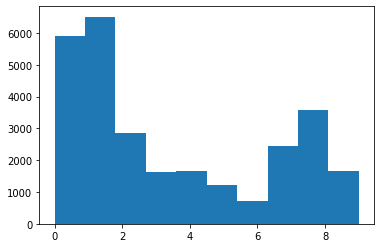

In [38]:
plt.hist(num_bought[len_user_click_history == 0])

(array([4392., 4360., 1999.,  921., 1379.,  762.,  253.,  953.,  927.,
         385.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

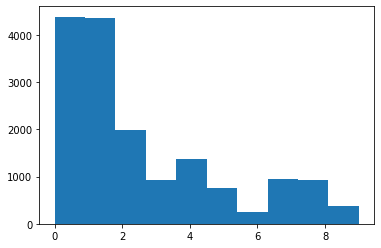

In [39]:
plt.hist(num_bought[(len_user_click_history >= 1) & (len_user_click_history <= 5)])

(array([3795., 3335., 1805.,  684., 1377.,  986.,  305., 1489., 1704.,
         652.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

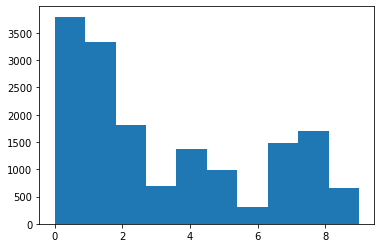

In [40]:
plt.hist(num_bought[(len_user_click_history >= 6) & (len_user_click_history <= 10)])

(array([5664., 4474., 2752.,  988., 2656., 2144.,  613., 3659., 4705.,
        1856.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

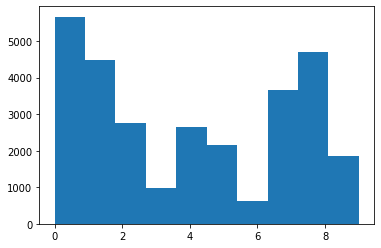

In [41]:
plt.hist(num_bought[(len_user_click_history >= 11) & (len_user_click_history <= 20)])

(array([3982., 2851., 1813.,  729., 2355., 1993.,  617., 3991., 5678.,
        2349.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

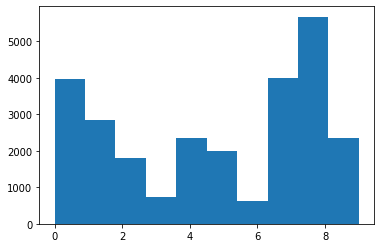

In [42]:
plt.hist(num_bought[(len_user_click_history >= 21) & (len_user_click_history <= 30)])

(array([2738., 2124., 1350.,  640., 2159., 1967.,  521., 4173., 7309.,
        3227.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

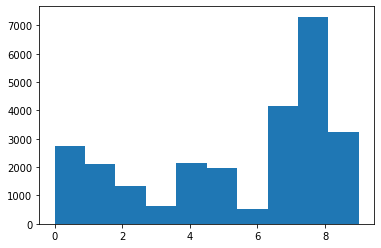

In [43]:
plt.hist(num_bought[(len_user_click_history >= 31) & (len_user_click_history <= 40)])